In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
y_true = np.load('/home/matsunaga/data/dense/y_true.npy')
y_pred = np.load('/home/matsunaga/data/dense/y_pred.npy')
y_pos  = np.load('/home/matsunaga/data/dense/posterior.npy')

In [88]:
y_true

array([1., 1., 1., ..., 0., 0., 0.])

In [89]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
y_pos

array([[9.9096346e-01, 9.0365643e-03],
       [9.9516535e-01, 4.8346235e-03],
       [9.8046607e-01, 1.9533951e-02],
       ...,
       [1.0000000e+00, 1.0944455e-08],
       [9.9999666e-01, 3.2870494e-06],
       [9.9692011e-01, 3.0799201e-03]], dtype=float32)

In [91]:
num_1=len(np.where(y_pred==1.0)[0])
num_0=len(np.where(y_pred==0.0)[0])
print(num_0)
print(num_1)
len(np.where(y_true!=y_pred)[0])

5677
1620


459

In [92]:
pair_1 = {'label':[0]*int(num_1), 'pos':[0]*int(num_1)}
pair_0 = {'label':[0]*int(num_0), 'pos':[0]*int(num_0)} 

c_0=0
c_1=0

for i in range(len(y_true)):
    label = y_true[i]
    pred = int(y_pred[i])
    pos = y_pos[i][int(y_pred[i])]
    if pred == 0:
        pair_0['label'][c_0] = label
        pair_0['pos'][c_0] = pos
        c_0 = c_0+1
    else:
        pair_1['label'][c_1] = label
        pair_1['pos'][c_1] = pos
        c_1 = c_1+1


In [93]:
label_1 = np.array(pair_1['label'])
pos_1 = np.array(pair_1['pos'])
label_0 = np.array(pair_0['label'])
pos_0 = np.array(pair_0['pos'])

In [94]:
#1を0と誤判
true_1_pred_0=pos_1[np.where(label_1==0.0)[0]]
true_0_pred_1=pos_0[np.where(label_0==1.0)[0]]

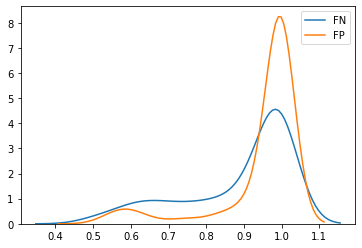

In [100]:
import seaborn as sns
plt.figure()
sns.distplot(true_1_pred_0,label='FN',hist=False)
sns.distplot(true_0_pred_1,label='FP',hist=False)
plt.legend()
plt.savefig('/home/matsunaga/data/dense/False_Posterior.png')

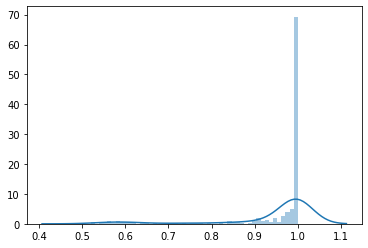

In [96]:
sns.distplot(true_0_pred_1)

In [80]:
import torch
out=torch.rand(16,2)

In [84]:
pred=torch.nn.functional.softmax(out,dim=1)
pred_ = torch.nn.functional.softmax(out,dim=0)

In [85]:
pred_


tensor([[0.0932, 0.0743],
        [0.0414, 0.0392],
        [0.0372, 0.0976],
        [0.0785, 0.0691],
        [0.0527, 0.0819],
        [0.0598, 0.0426],
        [0.0647, 0.0523],
        [0.0709, 0.0410],
        [0.0458, 0.0525],
        [0.0905, 0.0764],
        [0.0351, 0.0690],
        [0.0580, 0.0792],
        [0.0734, 0.0722],
        [0.0580, 0.0446],
        [0.0822, 0.0549],
        [0.0587, 0.0534]])